<a href="https://colab.research.google.com/github/6FAN/Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

* 01: Importing Some Necessary Libraries
****
* 02: Create DataFrame
****
* 03: Data Visualization
****
* 04: CountPlot
****
* 05: Correlation barplot
****
* 06: Data Preprocessing
****
* 07: Decision Tree in Gini Method
****
* 08: Decision Tree Entropy method
****
* 09: Result
****

In this section, I will implement a Naive Bayes algorithm in Machine Learning using Python. For this task, I will use a database of breast cancer tumour information for breast cancer detection.

# 01: Importing Some Necessary Libraries

****

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
sns.set_theme('paper')

In [ ]:
df = load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# malignant or benign value
labels = df["target"]
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

The target stores the values of malignant or benign tumors.

0 means malignant tumor, 1 mean benign tumor

In [ ]:
# target value name malignant or benign tumor
label_names = df["target_names"]
label_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
feature_names = df["feature_names"]
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# featurs of each cells in numeric format
features = df["data"]
features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
# name of features
print(df['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# location/path of data file
print(df['filename'])

breast_cancer.csv


# 02: Create DataFrame

****

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

* The mean, standard error, and "worst" or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

* target
    * 0 means malignant tumor,
    * 1 mean benign tumor

Now, we are creating DataFrame by concate 'data'and 'target' together and give columns name.

In [ ]:
# create datafrmae
c_df = pd.DataFrame(np.c_[
    df['data'],
    df['target']
],
    columns = np.append(
        df['feature_names'],['target']))

c_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
c_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [ ]:
# Information of cancer Dataframe
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We have a total of non-null 569 patients information with 31 features. All feature data types in the float. The size of the DataFrame is 137.9 KB.

In [ ]:
# Numerical distribution of data
c_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Numerical distribution of data. We can know to mean, standard deviation, min, max, 25%,50% and 75% value of each feature.

In [ ]:
c_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

We have clean and well formated DataFrame, so DtaFrame is ready to visualize.

# 03: Data Visualization

****

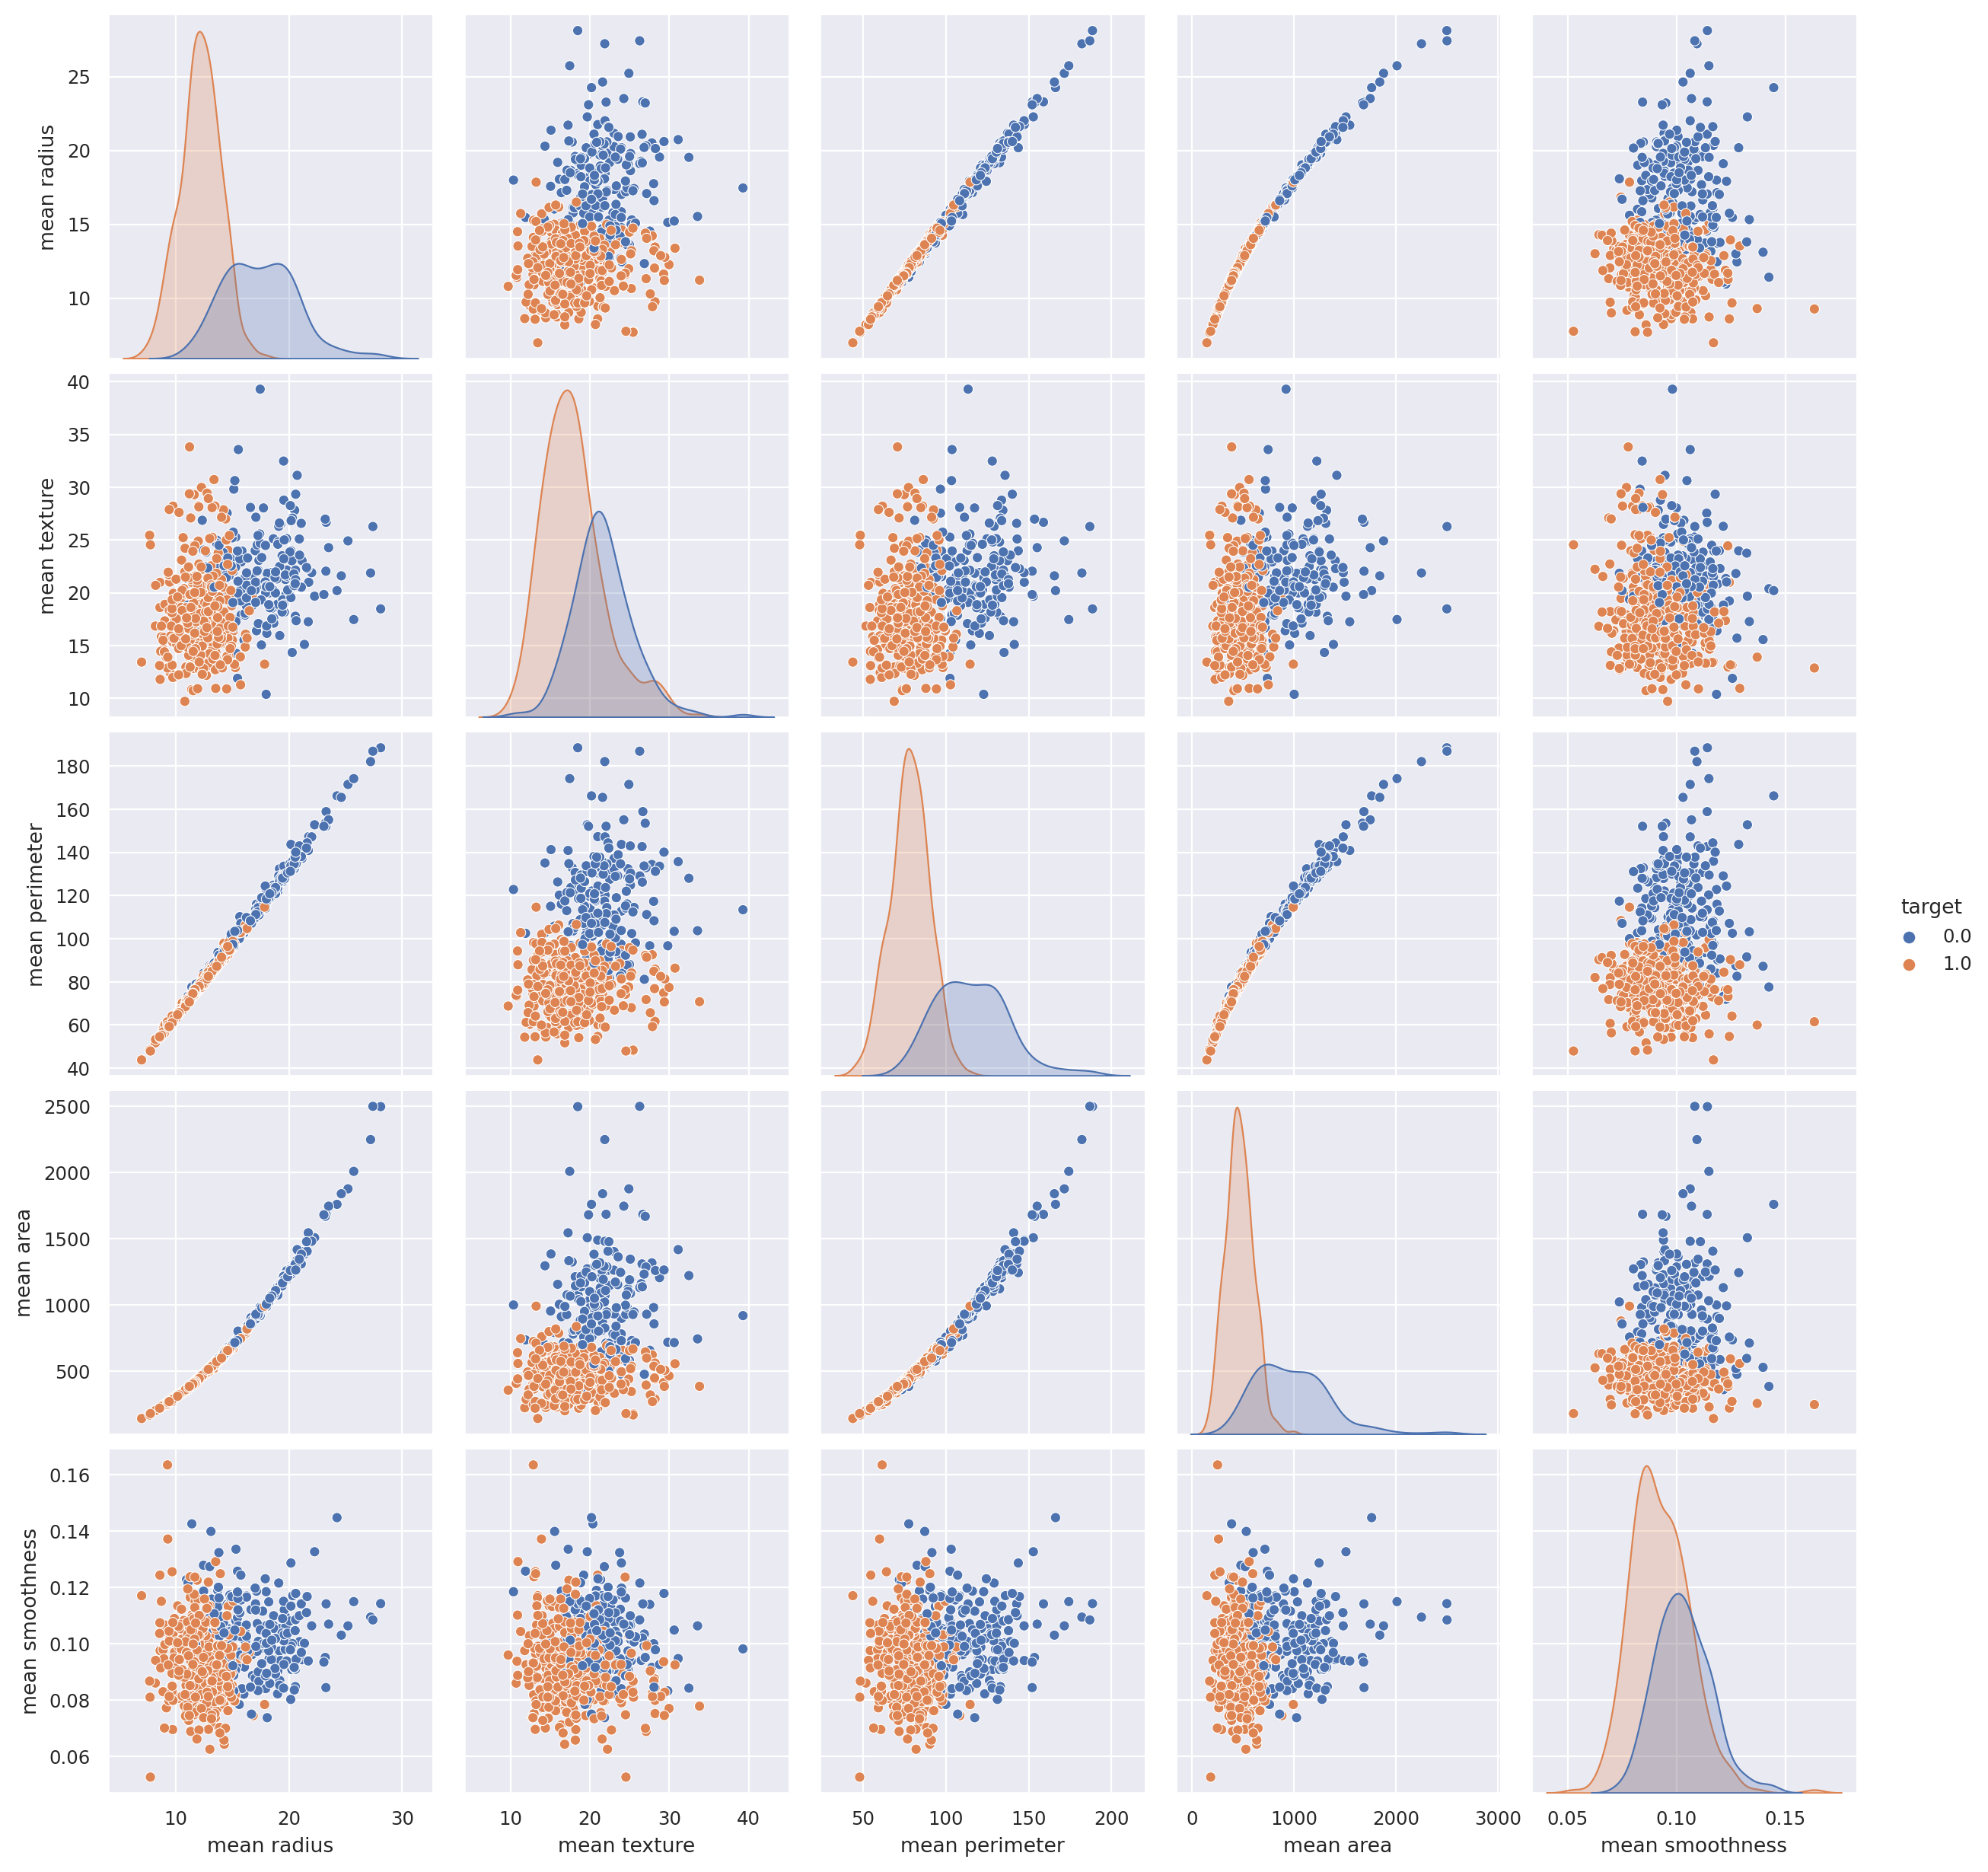

In [ ]:
# pair plot of sample feature
sns.pairplot(data=c_df,
             hue = 'target',
             vars = ['mean radius',
                     'mean texture',
                     'mean perimeter',
                     'mean area',
                     'mean smoothness'
                     ])

plt.show()

# 04: CountPlot

****

Showing the total count of malignant and benign tumor patients in Coutplot.

In [ ]:
c_df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

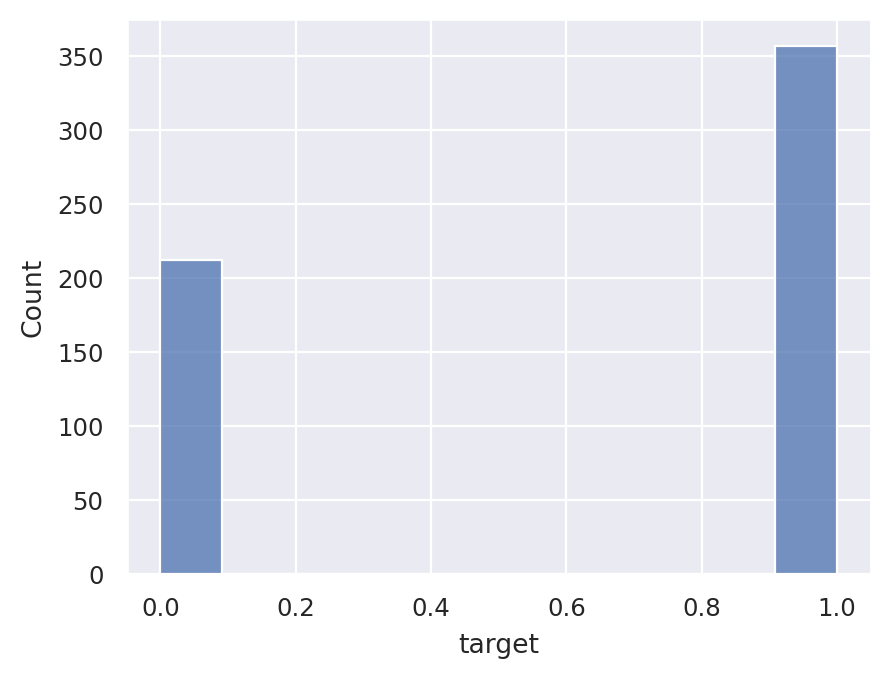

In [ ]:

sns.histplot(data=c_df, x="target")
plt.show()

In the below counterplot max samples mean radius is equal to 1.

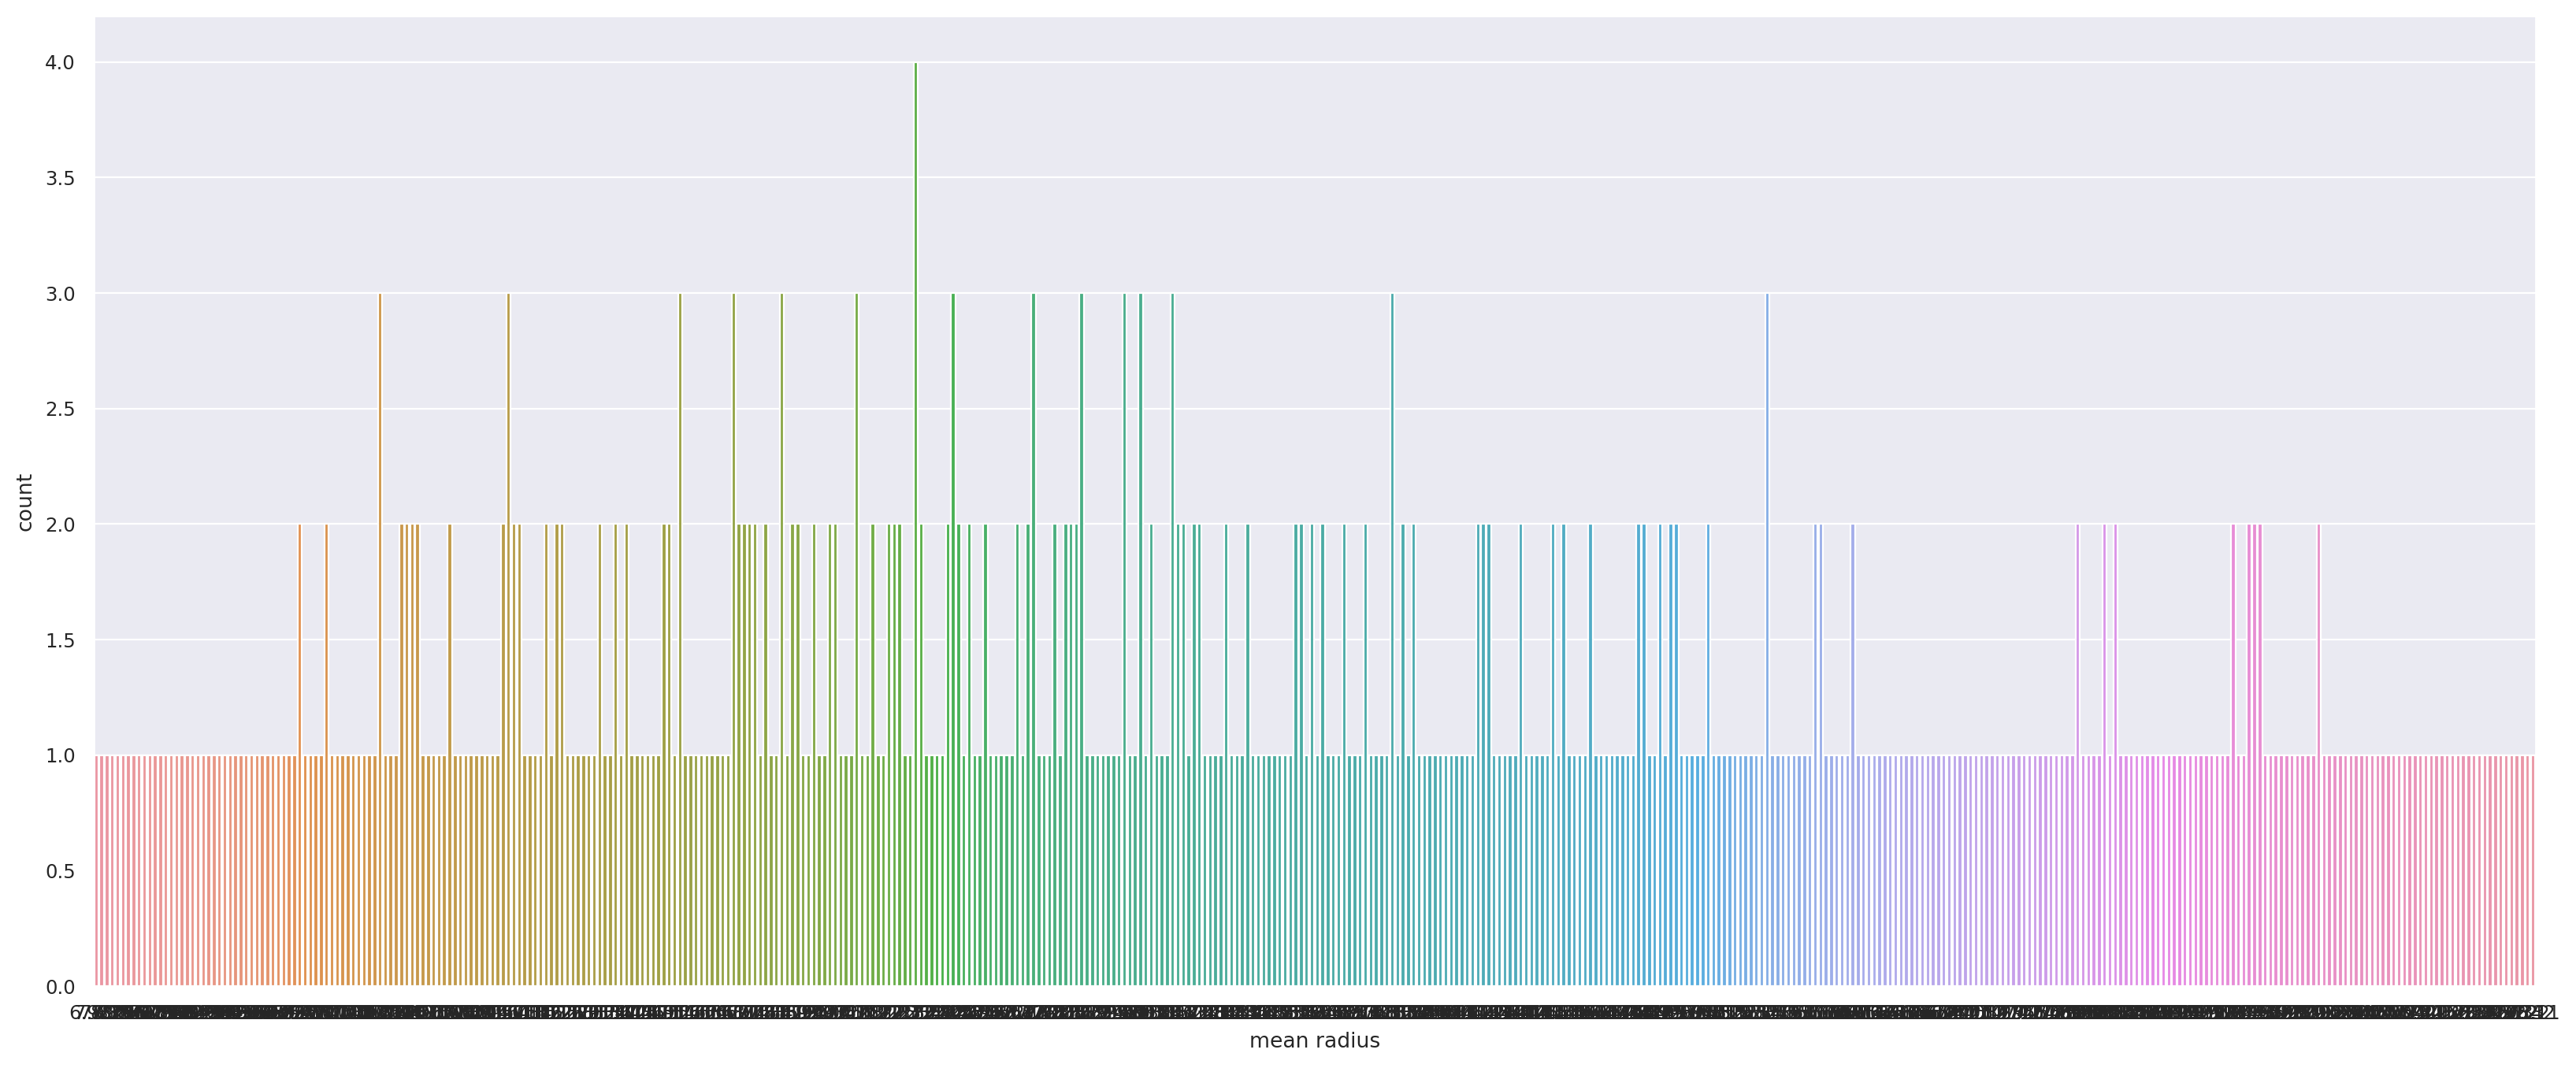

In [ ]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(data=c_df, x="mean radius")
plt.show()

# 05: Correlation barplot

****

Taking the correlation of each feature with the target and the visualize barplot.

In [ ]:
cor_df = c_df.drop(columns="target",
                   axis=1)

cor_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


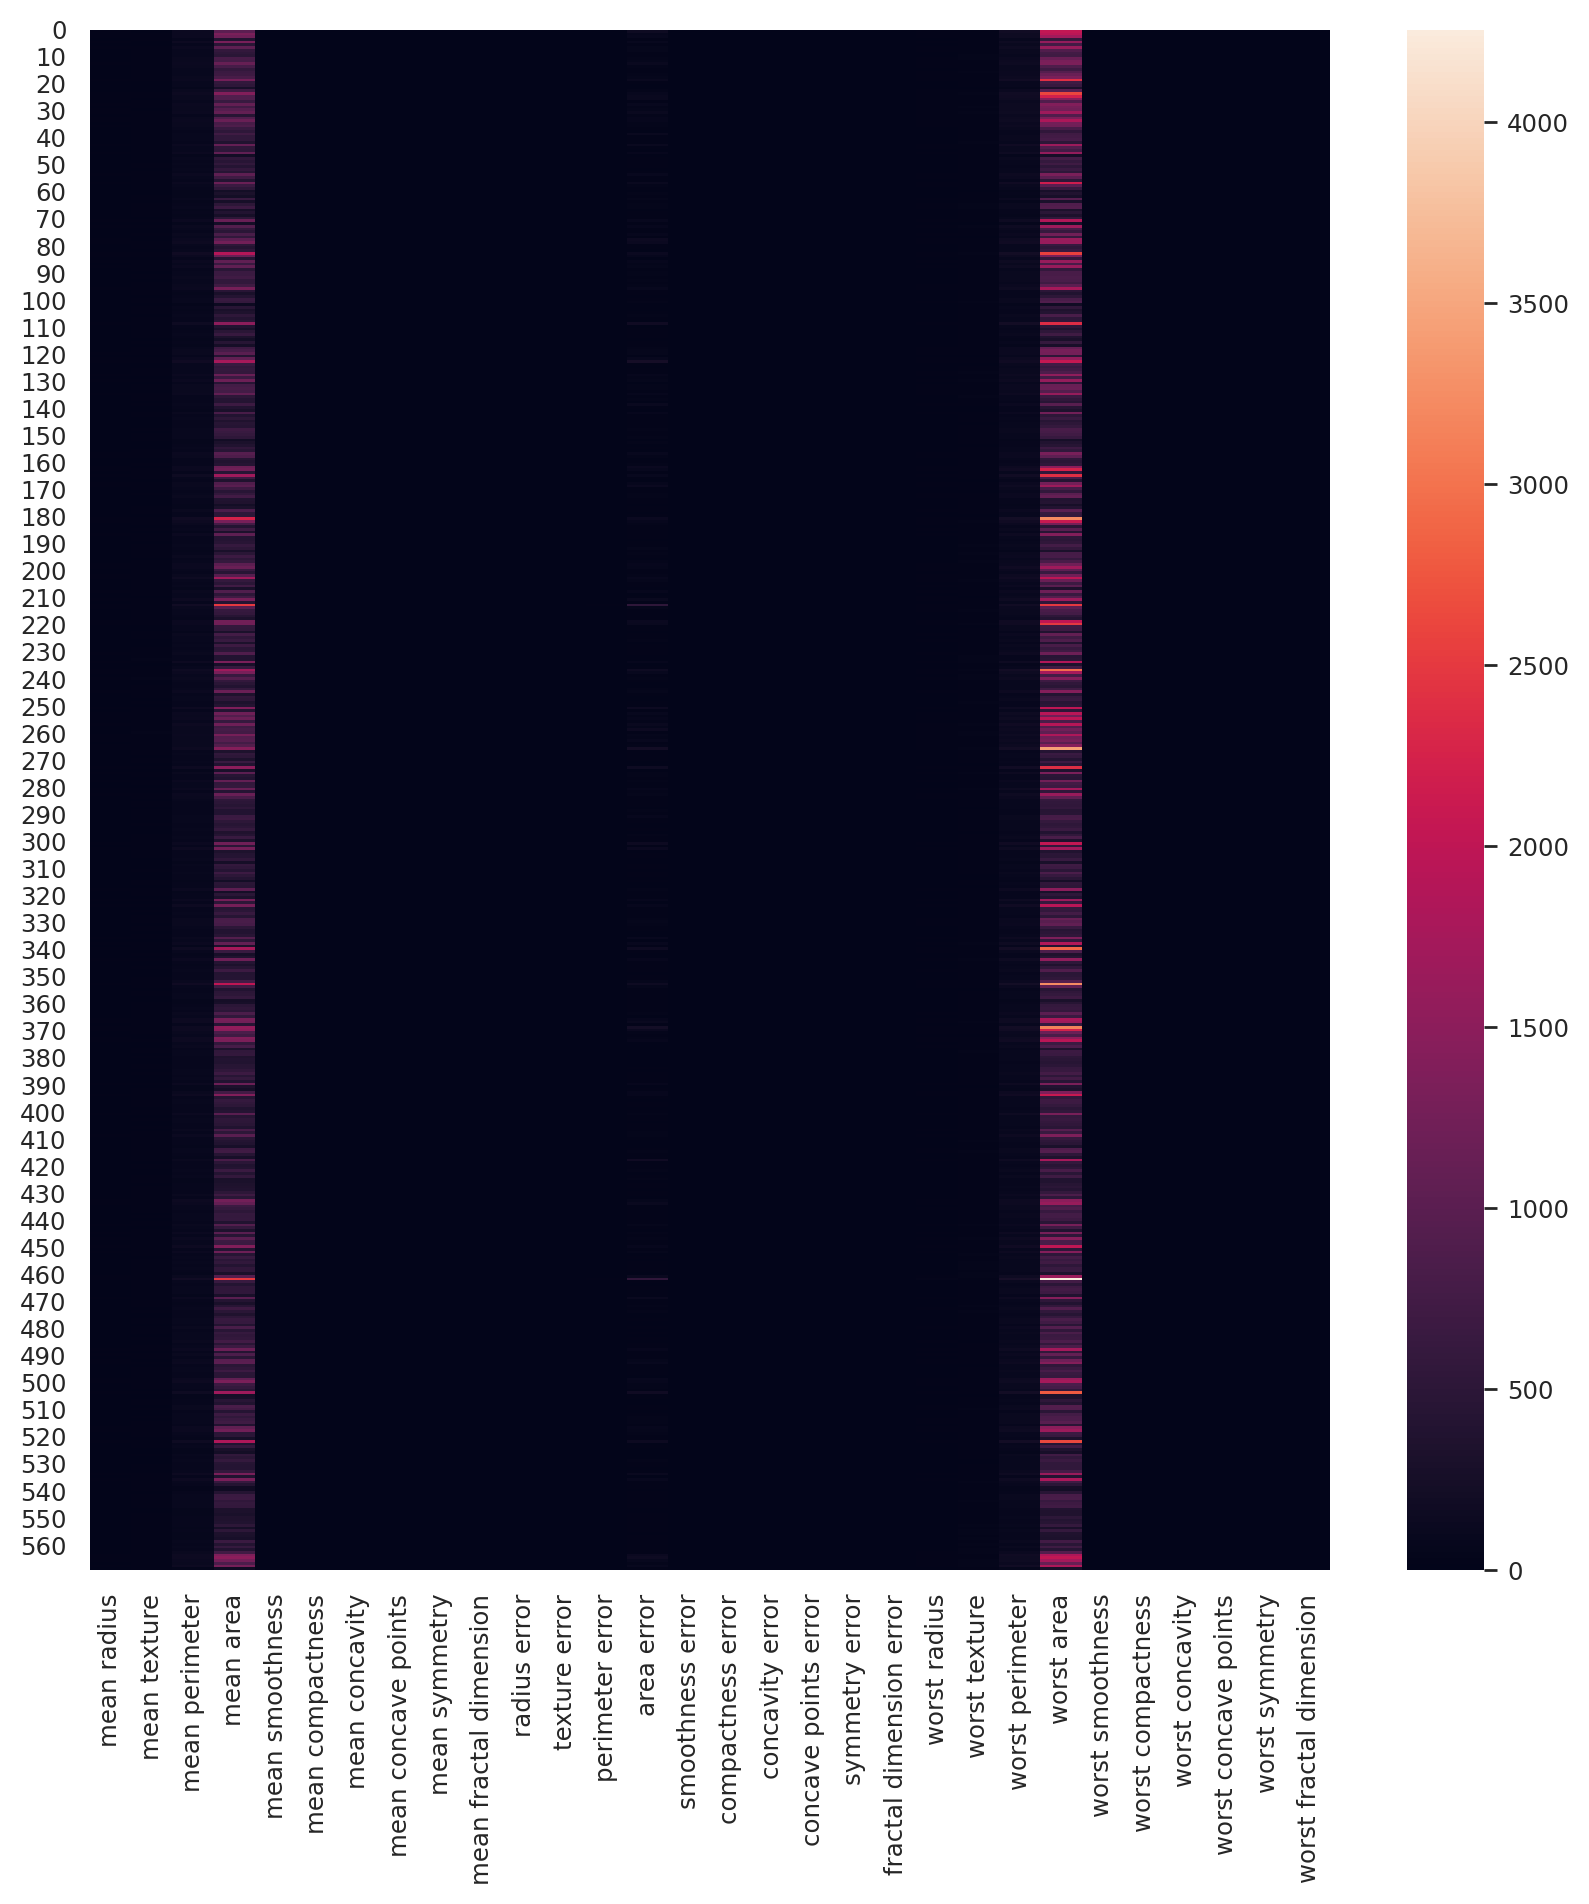

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=cor_df,)
plt.show()

HeatMap not visible so,

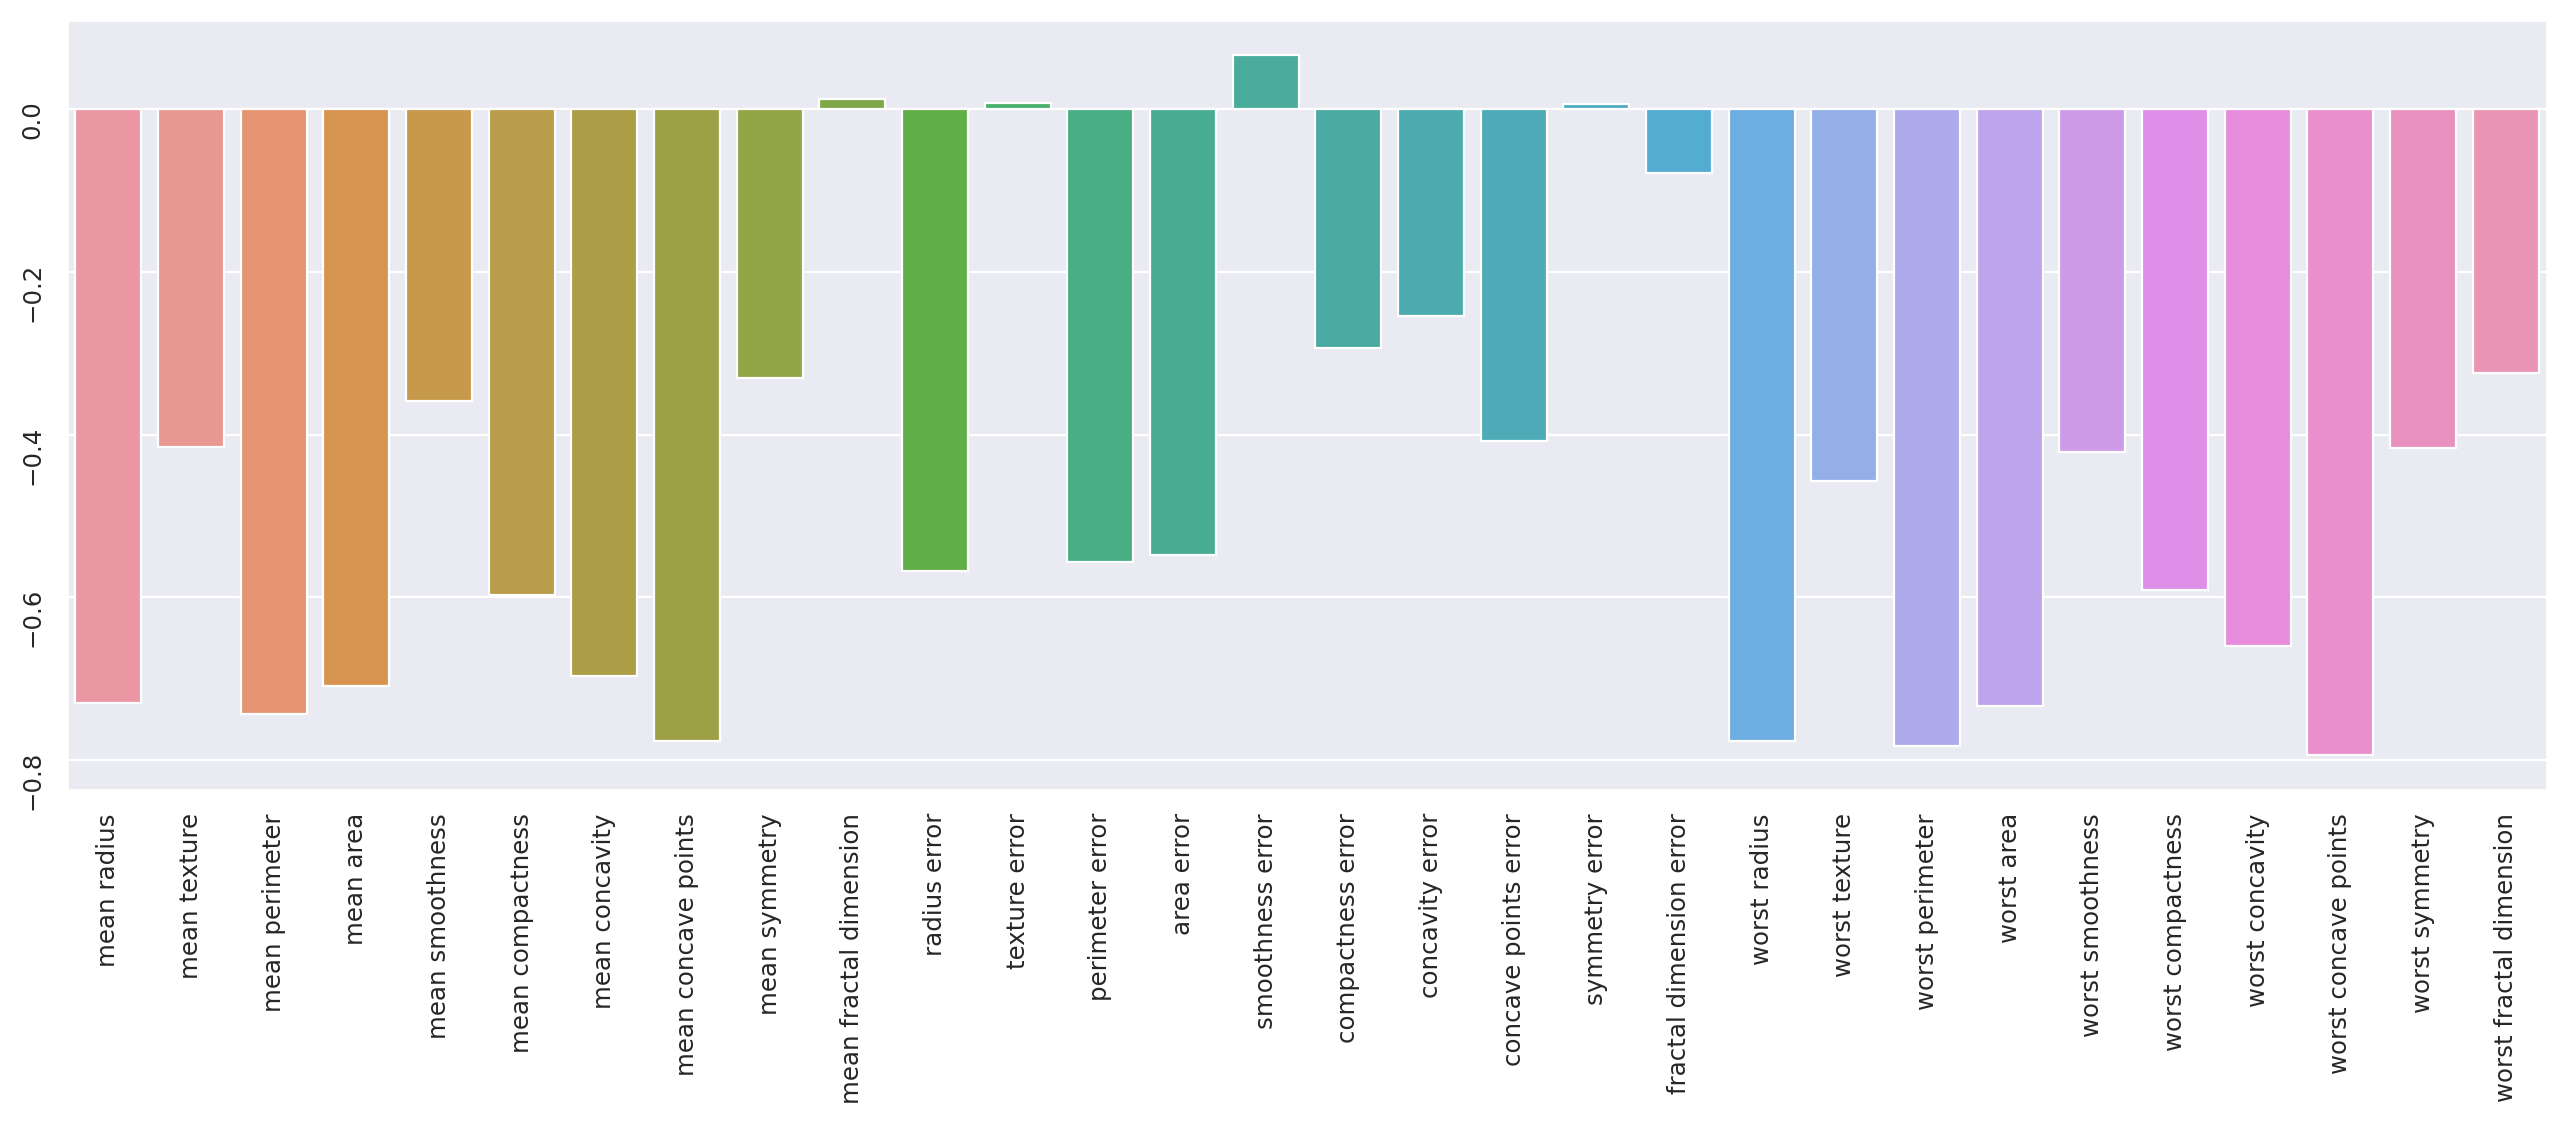

In [ ]:
# visualize correlation barplot
plt.figure(figsize = (16,5))

CorWit = sns.barplot(
    x = cor_df.corrwith(
        c_df.target).index ,

    y = cor_df.corrwith(
        c_df.target)
    )

CorWit.tick_params(labelrotation = 90)

In the above correlation barplot only feature 'smoothness error' is strongly positively correlated with the target than others. The features 'mean factor dimension', 'texture error', and 'symmetry error' are very less positive correlated and others remaining are strongly negatively correlated.

# 06: Data Preprocessing

****

In [ ]:
x = c_df.drop(columns='target', axis=1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = c_df.target
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=41)

In [ ]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
462,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,0.05433,...,15.40,31.98,100.40,734.6,0.10170,0.1460,0.1472,0.05563,0.2345,0.06464
262,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,...,20.39,27.24,137.90,1295.0,0.11340,0.2867,0.2298,0.15280,0.3067,0.07484
215,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,15.75,26.93,104.40,750.1,0.14600,0.4370,0.4636,0.16540,0.3630,0.10590
286,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,0.06766,...,13.24,27.29,92.20,546.1,0.11160,0.2813,0.2365,0.11550,0.2465,0.09981
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.17320,0.4967,0.5911,0.21630,0.3013,0.10670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.17800,0.2878,0.3186,0.14160,0.2660,0.09270
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
243,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,0.1773,0.05429,...,15.01,26.34,98.00,706.0,0.09368,0.1442,0.1359,0.06106,0.2663,0.06321
321,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,...,23.06,23.03,150.20,1657.0,0.10540,0.1537,0.2606,0.14250,0.3055,0.05933


In [ ]:
y_train

462    1.0
262    0.0
215    0.0
286    1.0
509    0.0
      ... 
469    1.0
407    1.0
243    1.0
321    0.0
80     1.0
Name: target, Length: 398, dtype: float64

# 07: Decision Tree in Gini Method

****

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DesTrCl_G = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4)

DesTrCl_G = DesTrCl_G.fit(x_train, y_train)

In [ ]:
y_pred = DesTrCl_G.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_G = accuracy_score(y_test, y_pred)

print(f'Accuracy is: {accuracy_G*100:.2f}%')

Accuracy is: 97.66%


In [ ]:
from sklearn import tree

text = tree.export_text(DesTrCl_G)
print(text)

|--- feature_23 <= 877.70
|   |--- feature_27 <= 0.14
|   |   |--- feature_12 <= 6.54
|   |   |   |--- feature_20 <= 16.82
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_20 >  16.82
|   |   |   |   |--- class: 0.0
|   |   |--- feature_12 >  6.54
|   |   |   |--- class: 0.0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 26.90
|   |   |   |--- feature_27 <= 0.18
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_27 >  0.18
|   |   |   |   |--- class: 0.0
|   |   |--- feature_21 >  26.90
|   |   |   |--- class: 0.0
|--- feature_23 >  877.70
|   |--- feature_24 <= 0.10
|   |   |--- class: 1.0
|   |--- feature_24 >  0.10
|   |   |--- feature_11 <= 0.47
|   |   |   |--- feature_20 <= 17.55
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_20 >  17.55
|   |   |   |   |--- class: 0.0
|   |   |--- feature_11 >  0.47
|   |   |   |--- feature_26 <= 0.18
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_26 >  0.18
|   |   |   |   |--- class: 0.0



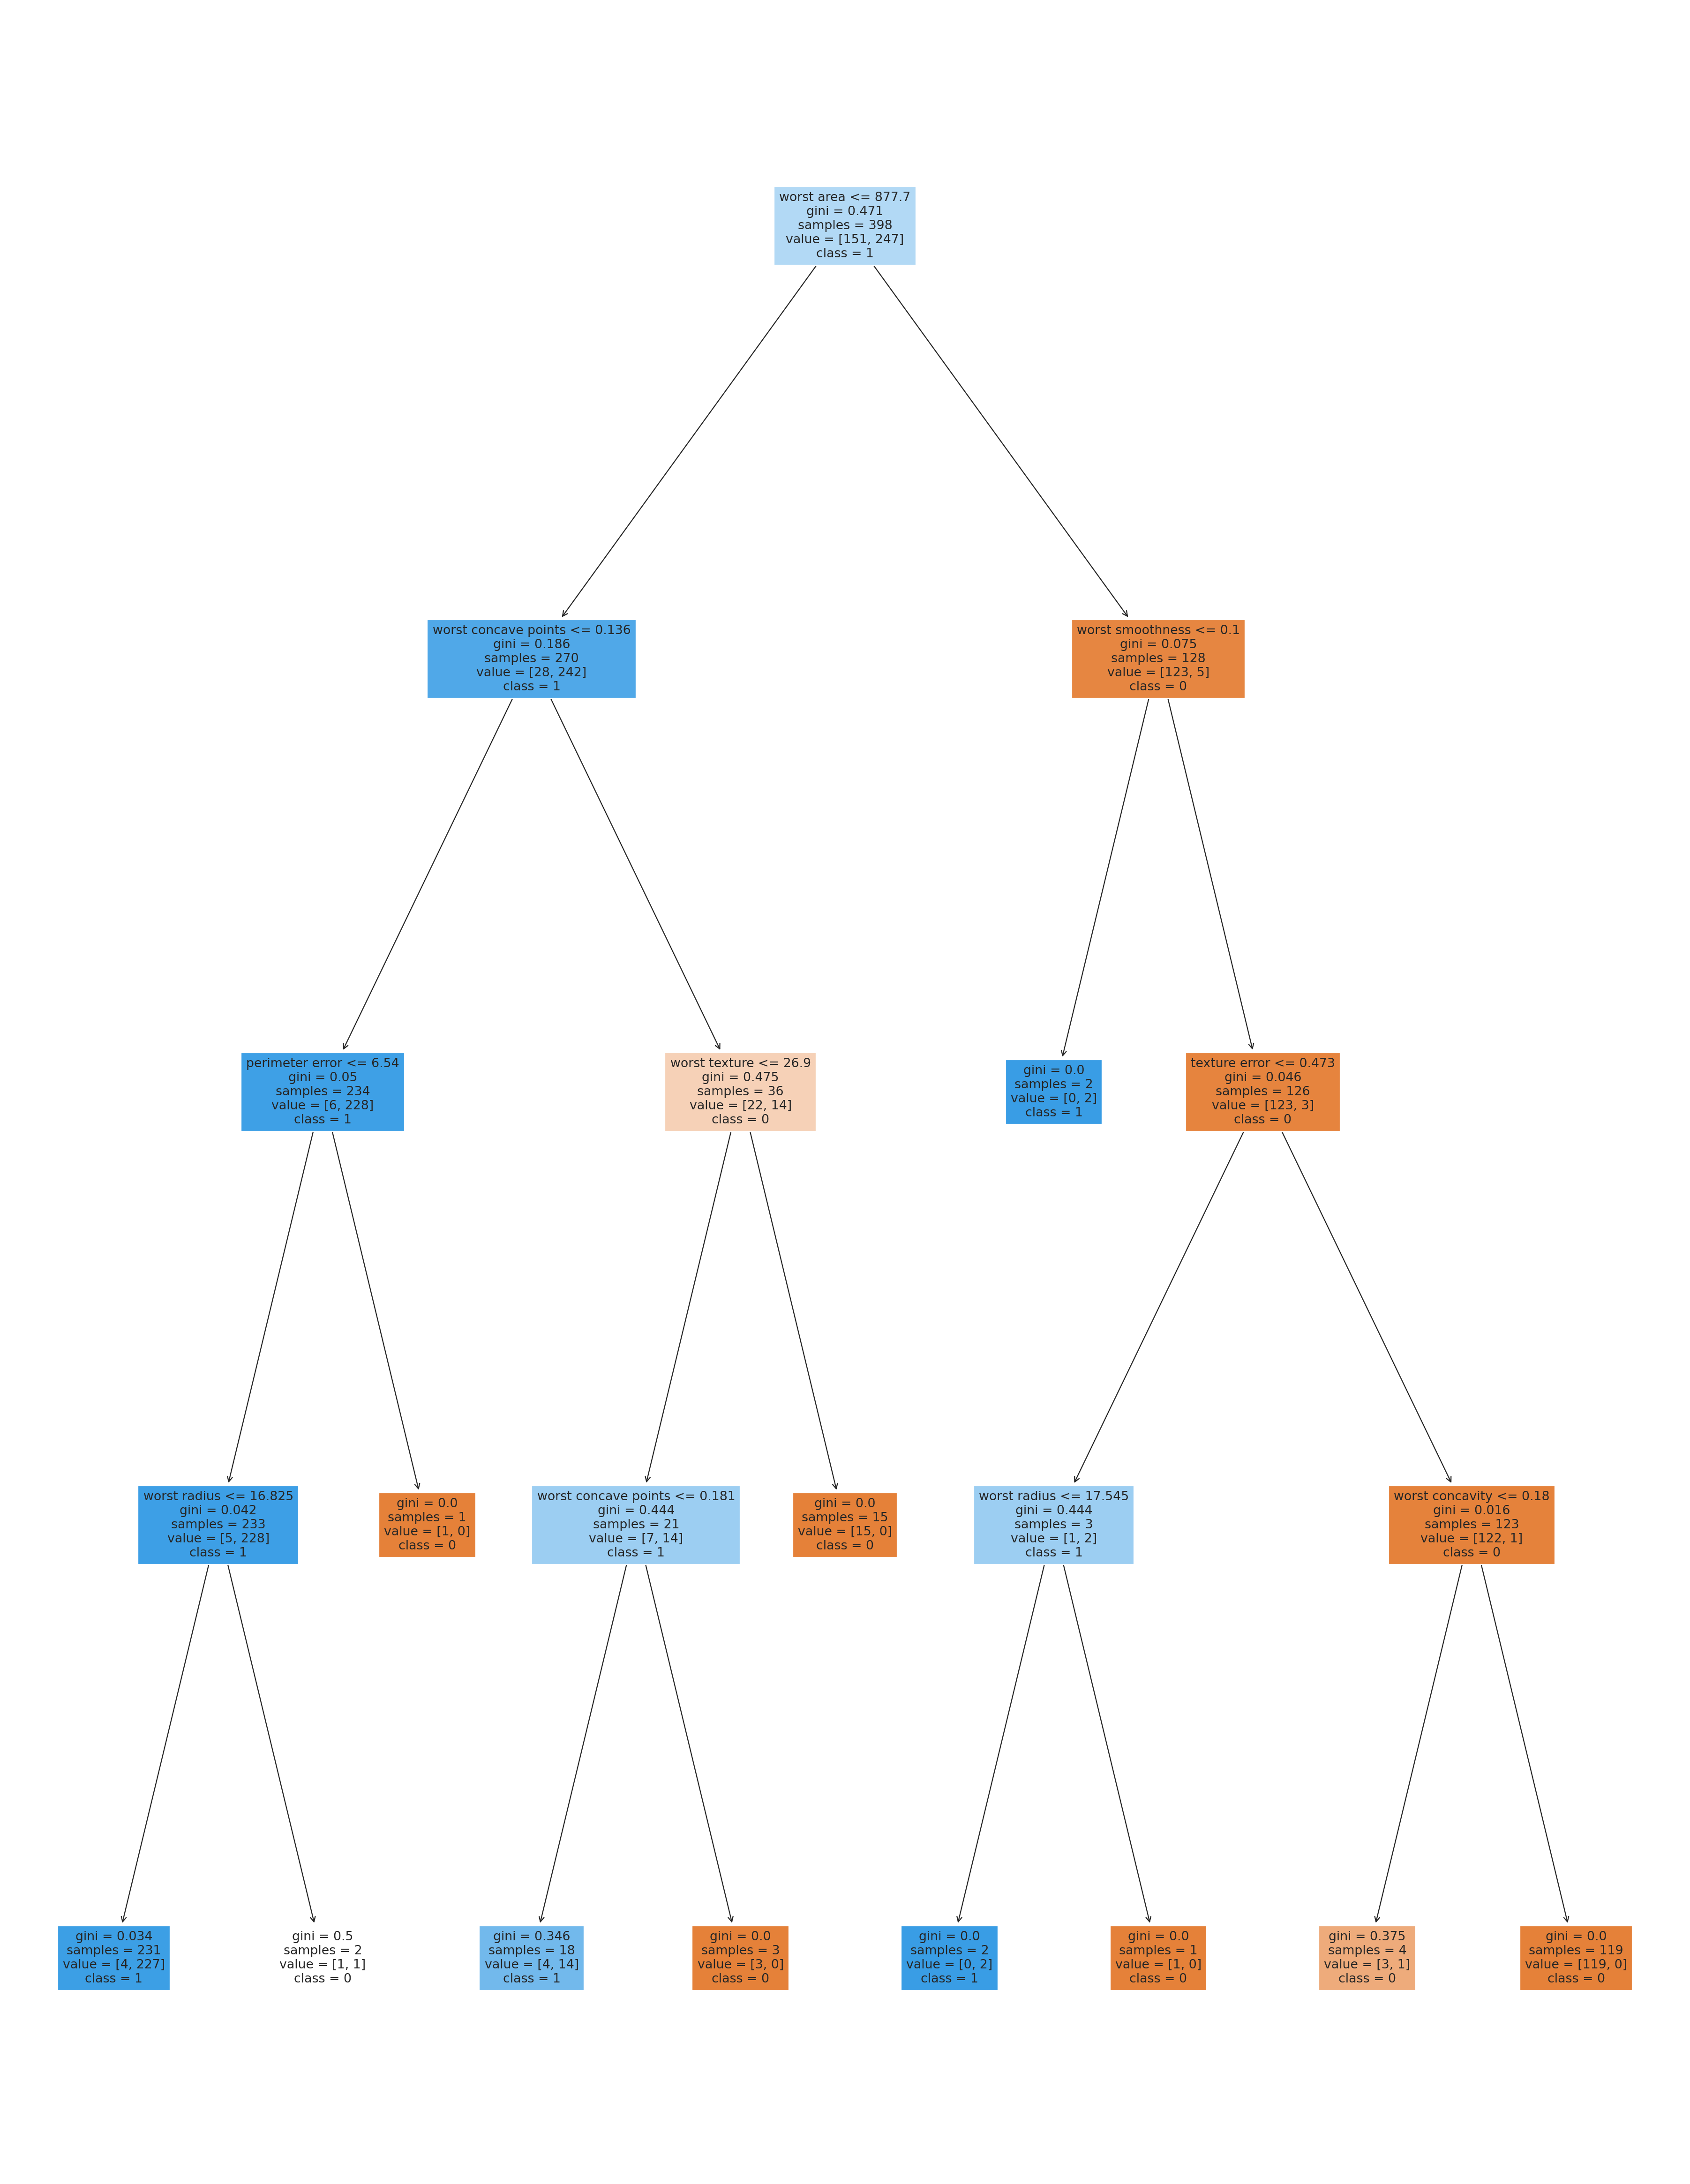

In [ ]:
features = [
    'mean radius', 'mean texture',
    'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness',
    'mean concavity','mean concave points',
    'mean symmetry',
    'mean fractal dimension',
    'radius error', 'texture error',
    'perimeter error', 'area error',
    'smoothness error','compactness error',
    'concavity error',
    'concave points error',
    'symmetry error',
    'fractal dimension error',
    'worst radius', 'worst texture',
    'worst perimeter', 'worst area',
    'worst smoothness',
    'worst compactness',
    'worst concavity',
    'worst concave points',
    'worst symmetry',
    'worst fractal dimension',]

target = ['0', '1']
fig = plt.figure(figsize=(23, 30))

plot = tree.plot_tree(
    DesTrCl_G,
    feature_names=features,
    class_names=target,
    filled=True
)

# 08: Decision Tree Entropy method

****

In [ ]:
DesTrCl_E = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4)

DesTrCl_E = DesTrCl_E.fit(x_train,
                          y_train)

y_pred = DesTrCl_E.predict(x_test)

In [ ]:
accuracy_E = accuracy_score(y_test, y_pred)

print(f'Accuracy is: {accuracy_E*100:.2f}%')

Accuracy is: 96.49%


In [ ]:
text = tree.export_text(DesTrCl_E)
print(text)

|--- feature_23 <= 877.70
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 38.60
|   |   |   |--- feature_21 <= 30.15
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_21 >  30.15
|   |   |   |   |--- class: 1.0
|   |   |--- feature_13 >  38.60
|   |   |   |--- feature_11 <= 2.01
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_11 >  2.01
|   |   |   |   |--- class: 0.0
|   |--- feature_27 >  0.14
|   |   |--- feature_21 <= 26.90
|   |   |   |--- feature_27 <= 0.18
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_27 >  0.18
|   |   |   |   |--- class: 0.0
|   |   |--- feature_21 >  26.90
|   |   |   |--- class: 0.0
|--- feature_23 >  877.70
|   |--- feature_6 <= 0.06
|   |   |--- feature_1 <= 19.54
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- class: 1.0
|   |   |--- feature_1 >  19.54
|   |   |   |--- class: 0.0
|   |--- feature_6 >  0.06
|   |   |--- class: 0.0



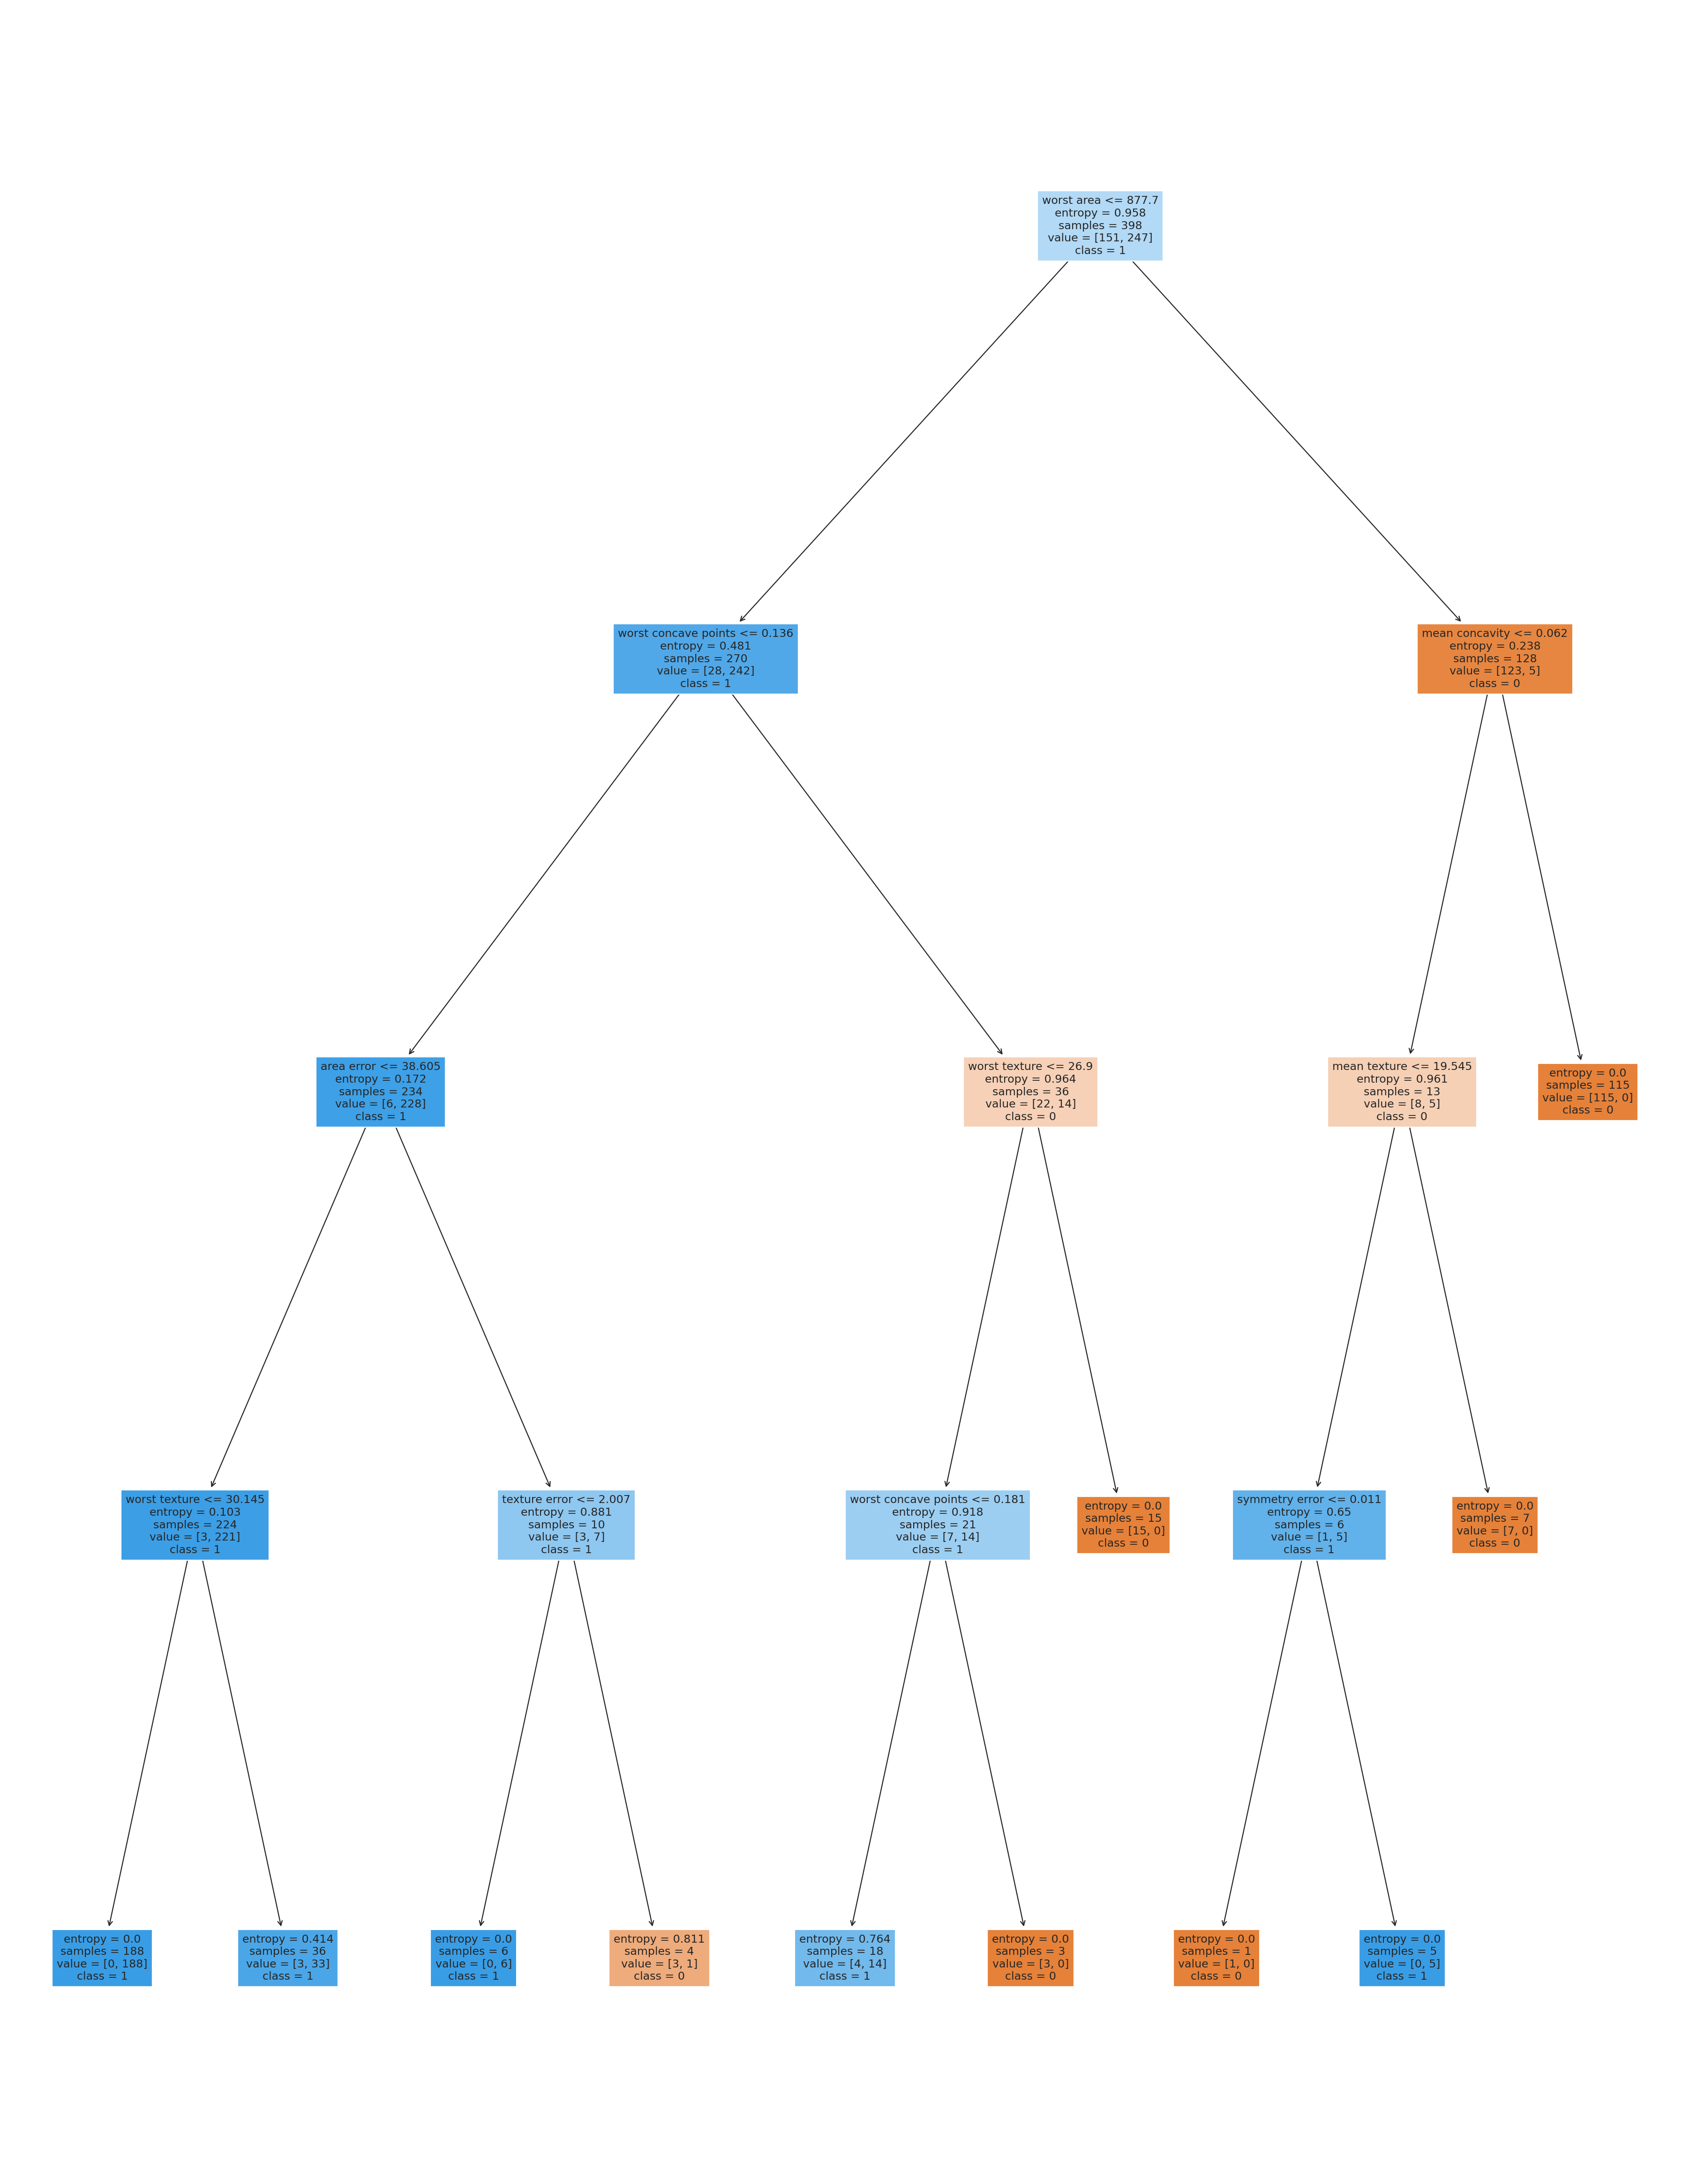

In [ ]:
features = [
    'mean radius', 'mean texture',
    'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness',
    'mean concavity','mean concave points',
    'mean symmetry',
    'mean fractal dimension',
    'radius error', 'texture error',
    'perimeter error', 'area error',
    'smoothness error','compactness error',
    'concavity error',
    'concave points error',
    'symmetry error',
    'fractal dimension error',
    'worst radius', 'worst texture',
    'worst perimeter', 'worst area',
    'worst smoothness',
    'worst compactness',
    'worst concavity',
    'worst concave points',
    'worst symmetry',
    'worst fractal dimension',]

target = ["0", "1"]

fig = plt.figure(figsize=(23, 30))

plot = tree.plot_tree(
    DesTrCl_E,
    feature_names=features,
    class_names=target,
    filled=True)

# 09: Result

****

In [ ]:
Result_df = pd.DataFrame(
    data=[["Decision Tree",
          accuracy_G,
          accuracy_E]],

    columns=[
        'MODEL',
        'GINI ACCURACY %',
        'ENTROPY ACCURACY %'
    ]

)
Result_df

,MODEL,GINI ACCURACY %,ENTROPY ACCURACY %
0,Decision Tree,0.976608,0.964912
